# Template Matching

In [2]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import cv2
from scipy.signal import correlate

(512, 512)


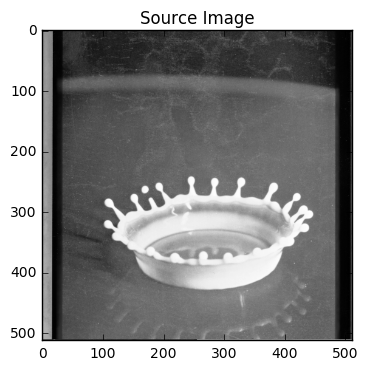

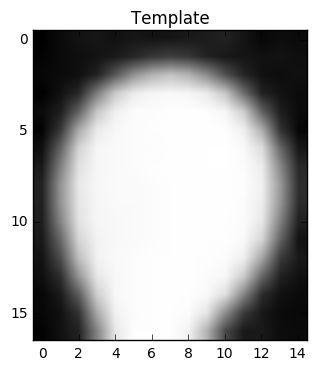

(17, 15)


In [3]:
img = cv2.imread("images/4.2.01.tiff", 0)
print (img.shape)

plt.imshow(img,cmap='gray'),plt.title('Source Image'),plt.show()
template = img[243:260,277:292]

plt.imshow(template,cmap='gray'),plt.title('Template'),plt.show()
print (template.shape)

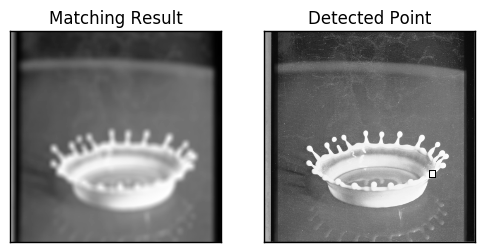

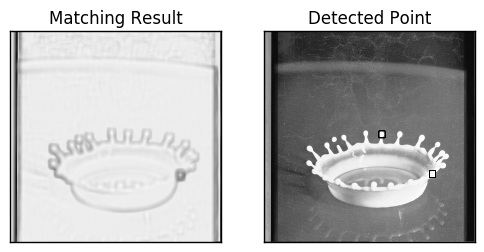

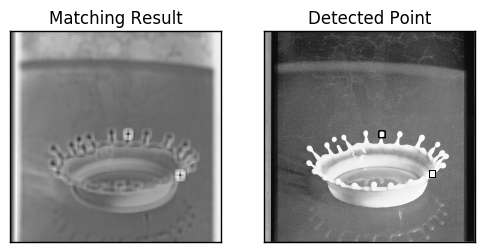

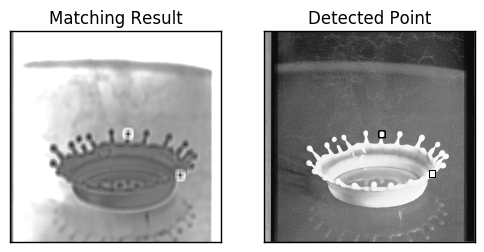

In [4]:
methods = [cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
w, h = template.shape[1],template.shape[0]

for method in methods:
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (0,0,255), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.show()